# IMAGE WITH NOISE ,RESTORING THE IMAGE,EDGE DETECTION SOBEL

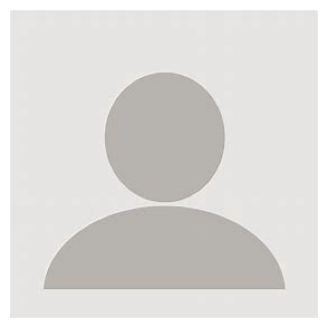

In [3]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\madhu\Downloads\profile.jpeg")
plt.figure(figsize=(6, 4))
plt.imshow(image)
plt.axis('off')
plt.show()

## view the gaussian noise and apply the filter to restore it

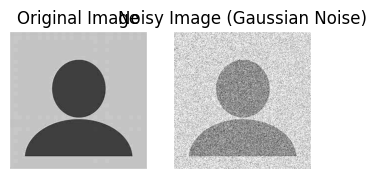

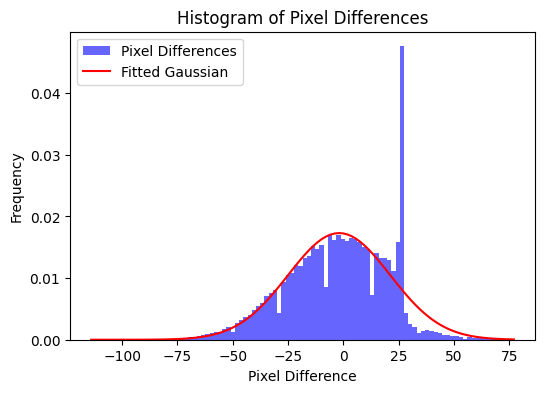

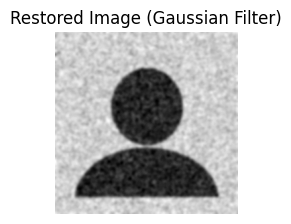

In [4]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter

image = cv2.imread(r"C:\Users\madhu\Downloads\profile.jpeg", cv2.IMREAD_GRAYSCALE)
mean = 0   
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = image.astype(np.float32) + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  
plt.figure(figsize=(6, 4))
plt.subplot(1,3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis("off")

plt.show()

diff = noisy_image.astype(np.float32) - image.astype(np.float32)
plt.figure(figsize=(6, 4))
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, label="Pixel Differences")

mean, std_dev = np.mean(diff), np.std(diff)
x = np.linspace(diff.min(), diff.max(), 100)
gaussian_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

plt.plot(x, gaussian_curve, color='red', label="Fitted Gaussian")

plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Pixel Differences")
plt.show()

plt.figure(figsize=(8, 5))
sigma = 2 
restored_image = gaussian_filter(noisy_image, sigma=sigma)
plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title("Restored Image (Gaussian Filter)")
plt.axis("off")

plt.show()


## uniform noise

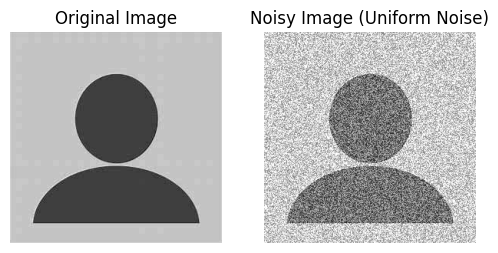

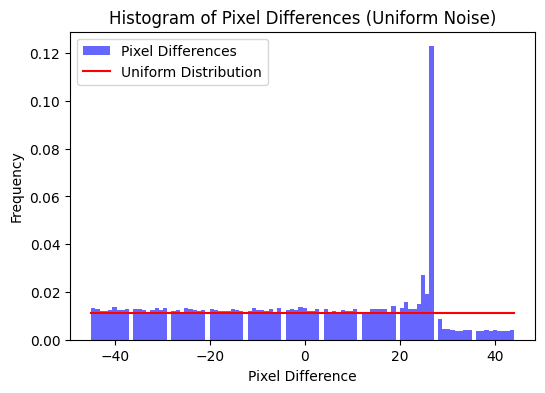

(np.float64(-0.5), np.float64(275.5), np.float64(275.5), np.float64(-0.5))

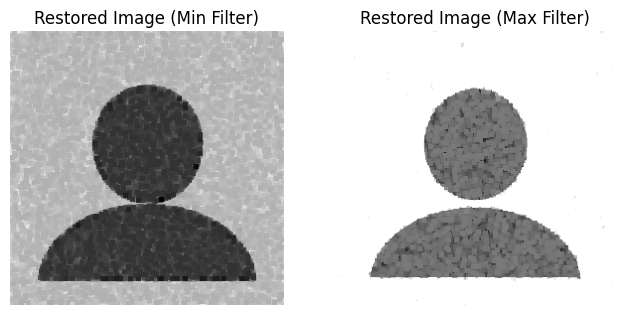

In [5]:
import numpy as np
import matplotlib.pyplot as plt


std_dev = 45 


uniform_noise = np.random.uniform(-std_dev, std_dev, image.shape)


noisy_image = image.astype(np.float32) + uniform_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Clip values to valid range


plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Uniform Noise)")
plt.axis("off")

plt.show()


diff = noisy_image.astype(np.float32) - image.astype(np.float32)
plt.figure(figsize=(6, 4))
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, label="Pixel Differences")

x = np.linspace(diff.min(), diff.max(), 100)
uniform_curve = np.ones_like(x) / (2 * std_dev)  

plt.plot(x, uniform_curve, color='red', label="Uniform Distribution")

plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Pixel Differences (Uniform Noise)")
plt.show()

kernel_size = 5  
min_filtered_image = cv2.erode(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))


max_filtered_image = cv2.dilate(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))

 
plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
plt.imshow(min_filtered_image, cmap='gray')
plt.title("Restored Image (Min Filter)")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title("Restored Image (Max Filter)")
plt.axis("off")



## salt and pepper noise

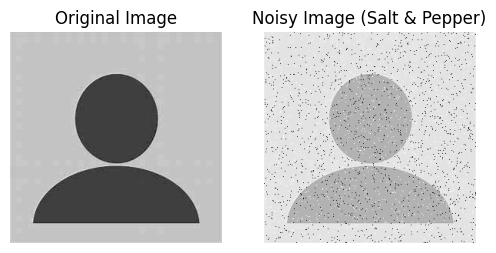

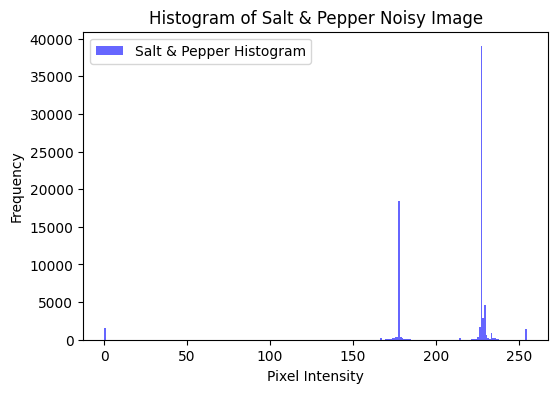

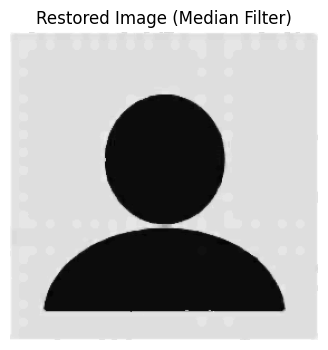

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image' is already loaded as a grayscale image

# Define noise density
salt_prob = 0.02  # Probability of white pixels (salt)
pepper_prob = 0.02  # Probability of black pixels (pepper)

# Create a copy of the image
noisy_image = np.copy(image)

# Generate random mask for salt noise (255)
salt_mask = np.random.rand(*image.shape) < salt_prob
noisy_image[salt_mask] = 255

# Generate random mask for pepper noise (0)
pepper_mask = np.random.rand(*image.shape) < pepper_prob
noisy_image[pepper_mask] = 0

# Display the original and noisy images
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.show()

# 📌 Plot histogram of the noisy image
plt.figure(figsize=(6, 4))
plt.hist(noisy_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.6, label="Salt & Pepper Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Salt & Pepper Noisy Image")
plt.show()

kernel_size = 5  # Size of the median filter kernel
median_filtered_image = cv2.medianBlur(noisy_image, kernel_size)

# Display the restored image using median filter
plt.figure(figsize=(6, 4))
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Restored Image (Median Filter)")
plt.axis("off")
plt.show()


## sobel edge detector

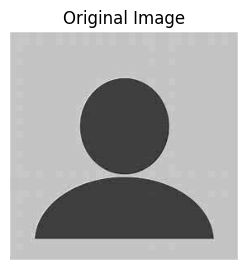

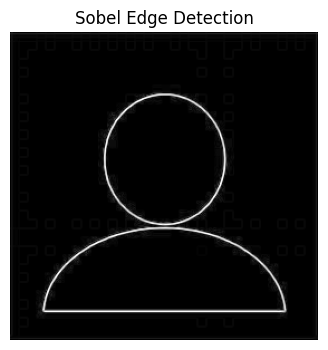

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


gray = image  

# Apply Sobel operator
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Sobel filter in Y direction

# Compute gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255).astype(np.uint8)  # Normalize values

# Display images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")



# Display combined edge-detected image
plt.figure(figsize=(6, 4))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()


## manually

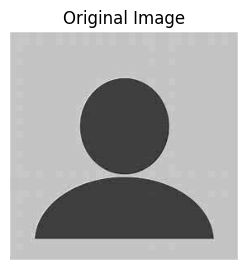

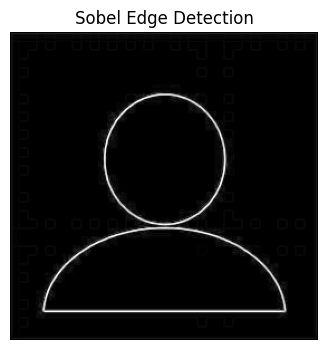

In [9]:
image = cv2.imread(r"C:\Users\madhu\Downloads\profile.jpeg", cv2.IMREAD_GRAYSCALE)

sobel_x_kernel = np.array([[-1, 0, 1], 
                            [-2, 0, 2], 
                            [-1, 0, 1]], dtype=np.float32)

sobel_y_kernel = np.array([[-1, -2, -1], 
                            [ 0,  0,  0], 
                            [ 1,  2,  1]], dtype=np.float32)


height, width = image.shape


sobel_x = np.zeros_like(image, dtype=np.float32)
sobel_y = np.zeros_like(image, dtype=np.float32)


for i in range(1, height - 1):
    for j in range(1, width - 1):
        
        region = image[i-1:i+2, j-1:j+2]
        
        
        gx = np.sum(region * sobel_x_kernel)
        gy = np.sum(region * sobel_y_kernel)
        
        
        sobel_x[i, j] = gx
        sobel_y[i, j] = gy


sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255).astype(np.uint8)  # Normalize


plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")



plt.figure(figsize=(6, 4))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()
